## `np.digitize()`

In [8]:
import numpy as np

In [9]:
rands = np.random.rand(20)
rands

array([0.23756752, 0.3496109 , 0.57659196, 0.1687269 , 0.08196488,
       0.79084271, 0.95468773, 0.49252782, 0.61216064, 0.26527687,
       0.29509178, 0.5114945 , 0.38381201, 0.4895047 , 0.60625166,
       0.36506762, 0.76391885, 0.6872961 , 0.64457986, 0.67710792])

In [10]:
hist = np.histogram(rands)

In [11]:
np.digitize(rands, hist[1])

array([ 2,  4,  6,  1,  1,  9, 11,  5,  7,  3,  3,  5,  4,  5,  7,  4,  8,
        7,  7,  7])

## Feature Selection

In [15]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, SelectFromModel

## Partial Correlation

Suppose we have a multiple linear regression of $y$ on $x_1$, $x_2$, $x_3$, and $x_4$. [This page](https://www.real-statistics.com/time-series-analysis/stochastic-processes/partial-autocorrelation-function/) tells us that the partial correlation between $y$ and $x_1$ can be calculated as "the correlation between the residuals of the regression of $y$ on $x_2$, $x_3$, and $x_4$ with the residuals of $x_1$ on $x_2$, $x_3$, and $x_4$". Let's see if we can verify this.

In [18]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
from scipy import stats

In [2]:
X, y = make_regression(n_features=4, random_state=42)

In [3]:
x1 = X[:, 0]
x_rest = X[:, 1:]
lr = LinearRegression().fit(x_rest, y)

In [4]:
y_resids = lr.predict(x_rest) - y

In [5]:
lrx = LinearRegression().fit(x_rest, x1)

In [6]:
x_resids = lrx.predict(x_rest) - x1

In [9]:
np.corrcoef(y, x1)[0, 1]

0.02459928220307856

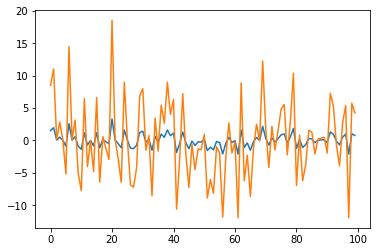

In [10]:
fig, ax = plt.subplots()
xx = np.arange(100)
ax.plot(xx, x_resids)
ax.plot(xx, y_resids);

In [11]:
np.corrcoef(y_resids, x_resids)[0, 1]

1.0

In [12]:
np.cov(y, lrx.predict(x_rest))[0, 1] /\
np.sqrt(np.var(lr.predict(x_rest))*np.var(lrx.predict(x_rest)))

-0.7055812322337391

### Second Example

In [13]:
X = np.array([2, 4, 15, 20])
Y = np.array([1, 2, 3, 4])
Z = np.array([0, 0, 1, 1]).reshape(-1, 1)

In [14]:
lr = LinearRegression().fit(Z, X)

In [15]:
lr2 = LinearRegression().fit(Z, Y)

In [16]:
XResids = lr.predict(Z) - X
YResids = lr2.predict(Z) - Y

In [17]:
np.corrcoef(XResids, YResids)[0, 1]

0.9191450300180579

### Third Example

In [19]:
dist = stats.norm()

fake_time = dist.rvs(100)

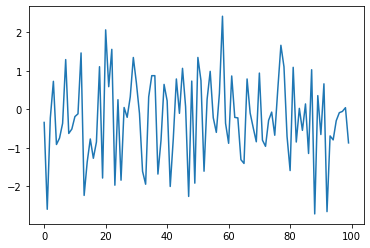

In [23]:
fig, ax = plt.subplots()

x_ax = np.arange(100)
ax.plot(x_ax, fake_time);

In [53]:
pacf(fake_time, nlags=4, method='ols-adjusted')

array([ 1.        , -0.14575655, -0.08296807, -0.19901497,  0.06643786])

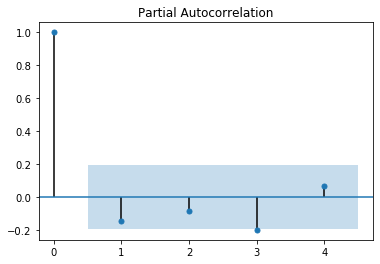

In [60]:
plot_pacf(fake_time, method='ols-adjusted', lags=4);

In [37]:
series = pd.Series(fake_time)

In [44]:
Z = np.hstack([series.shift(j).values.reshape(-1, 1) for j in range(2, 5)])

In [46]:
lry = LinearRegression().fit(Z[4:, :], series[4:])

In [47]:
lrx = LinearRegression().fit(Z[4:, :], series.shift()[4:])

In [48]:
y_resids = lry.predict(Z[4:, :]) - series[4:]
x_resids = lrx.predict(Z[4:, :]) - series.shift()[4:]

In [50]:
np.corrcoef(y_resids, x_resids)[0, 1]

-0.16554485905392927

### Fourth Example

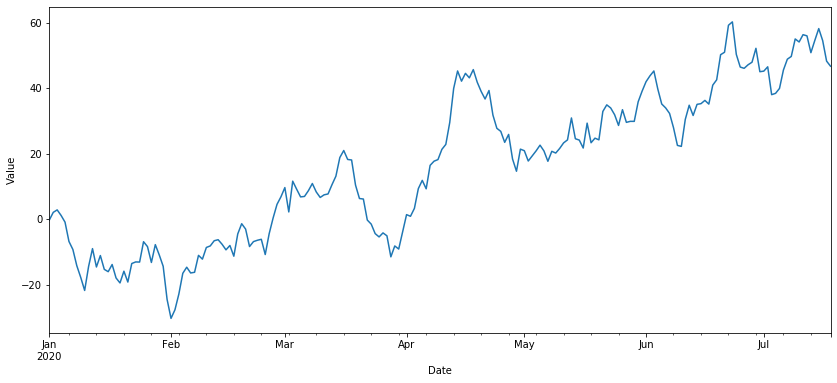

In [30]:
avg = 0
std = 4
n_pts = 200

# Dates & white noise (epsilon)
date_vals = pd.date_range(start='1/1/2020', periods=n_pts)
epsilon = np.random.normal(avg, std, n_pts)

# Generate data starting at y0 & "walk" based on epsilon (white noise model)
y0 = 0
vals = y0 + np.cumsum(epsilon) 
time_series = pd.Series(vals, index=date_vals)

# Plot out the model
ax = time_series.plot(figsize=(14, 6))
ax.set_ylabel("Value")
ax.set_xlabel("Date")
plt.show()

In [33]:
pacf(time_series, nlags=10)

array([ 1.        ,  0.98401318, -0.08565679, -0.10621459, -0.07232637,
        0.01019665, -0.00654946, -0.03380922,  0.14000464, -0.11083363,
       -0.17855616])

## Covariance = Correlation

In [69]:
data = np.array([(2, 6), (2, 6), (4, 8), (4, 8), (3, 7)])

In [70]:
np.corrcoef(data[:, 0], data[:, 1])

array([[1., 1.],
       [1., 1.]])

In [71]:
np.cov(data[:, 0], data[:, 1])

array([[1., 1.],
       [1., 1.]])

## Mechanics

In [377]:
def position(t, x_0=0, v_0=0, a=-9.8):
    return x_0 + v_0 * t + 0.5 * a * t**2

In [379]:
position(1, x_0=100)

95.1

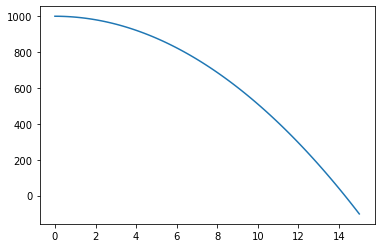

In [387]:
t = np.linspace(0, 15, 100)

plt.plot(t, position(t, x_0=1000));